In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from glob import glob

from astropy.coordinates import Distance
from astropy import units as u

## On Axis

In [21]:
def Mag_dist(x):
    mu = 15.35
    sig = 1.59
    g = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2* ((x-mu)/sig)**2 )
    return g

def Lifetime(Lim, x):
    mag = Mag_dist(x)
    time = 10**((Lim-x)/2.5)
    return time
def M_0_lim(Lim,Time):
    return Lim - 2.5*np.log10(Time)

In [7]:
x = np.arange(10,22,0.1)
y = Mag_dist(x)

<IPython.core.display.Javascript object>


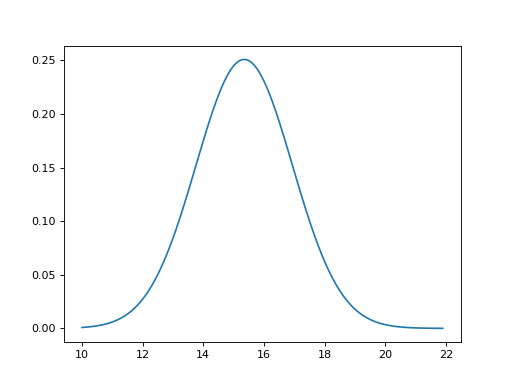

In [8]:
plt.figure()
plt.plot(x,y)

<IPython.core.display.Javascript object>


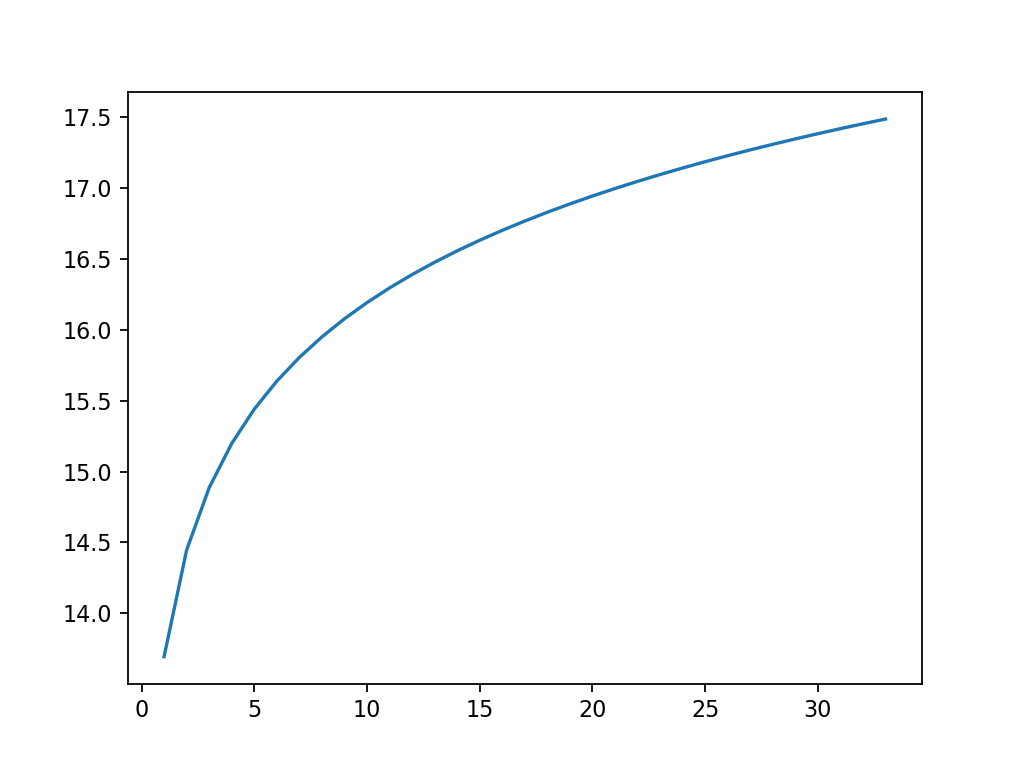

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
t = np.arange(0,1000,30)
plt.figure()
plt.plot(10+2.5*np.log10(t))
#plt.ylim(15,10)

In [16]:
life = Lifetime(21,x)

<IPython.core.display.Javascript object>


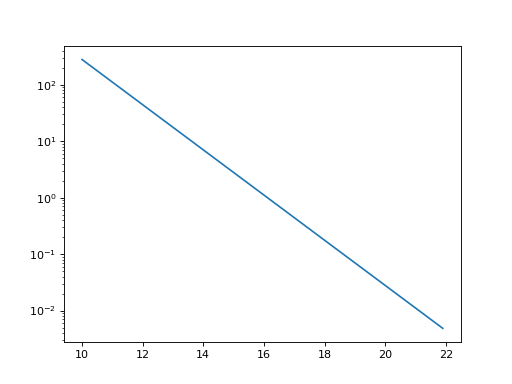

In [20]:
plt.figure()
plt.semilogy(x,life/90)

In [22]:
M_0_lim(21,90)

16.114393726401687

In [23]:
import scipy.integrate as integrate

/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
integrate.quad(lambda x: Mag_dist(x),-np.inf,16)

(0.6586586263939984, 6.8969523553507e-09)

In [144]:
def GRB_prob(Lim,Time):
    """
    Calculate the probability that the GRB is observed.
    Inputs:
    -------
    Lim  - float, limiting magnitude
    Time - float, detection time in minutes
    
    Output:
    -------
    CDF - float, probability the random GRB is detectable
    """
    m0_lim = M_0_lim(Lim,Time)
    #plt.figure()
    #plt.hist(m0_lim.flatten(),bins =100)
    CDF = 1/2*(1+erf((m0_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [145]:
GRB_prob(mag,90)

array([[6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02

In [149]:
def GRB_rate(Limit,Duration):
    """
    Calculate the expected number of detected GRBs for a given Kepler pixel.
    
    Inputs:
    -------
    Limit    - float, Kepler magnitude limit for a pixel
    Duration - float, duration of the K2 campaign in days
    
    Output:
    -------
    numbers - float, expected number of observed GRBs
    """
    rate = 300 / 365 / 41253 # GRB / day / deg2
    pix_area = (4 / 60 / 60)**2 # deg2
    if type(Limit) != int:
        pix_area = pix_area * Limit.shape[0] * Limit.shape[1]
    Duration = Duration / 365 # yr
    lifetime = 90 # min for 3 Kepler frames
    
    prob = GRB_prob(Limit,lifetime)
    
    number = rate * pix_area * Duration * prob
    
    return number
    

In [164]:
def Total_GRB_rate(Folder,Duration):
    """
    Calculate the expected number of GRBs observed in a K2 campaign.
    
    Inputs:
    -------
    Folder   - str, directory with limit frames 
    Duration - float, duration of the K2 campaign in days
    
    Output:
    numbers - float, expected number of observed GRBs
    """
    files = glob(Folder + '*.npy')
    numbers = 0.0
    for file in files:
        arr = np.load(file)
        data = arr[0] + arr[1]
        mag = -2.5*np.log10(data) + 24.47
        num = GRB_rate(mag,Duration)
        numbers += np.nansum(num)
    return numbers


In [161]:
from tqdm import trange
path = '../../Data/Limit/c01/Limit/'

In [162]:
c01_number = Total_GRB_rate(path, 81)


  0%|          | 0/18529 [00:00<?, ?it/s]/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10

 68%|██████▊   | 12557/18529 [00:33<00:39, 152.12it/s]


100%|█████████▉| 18527/18529 [00:49<00:00, 472.39it/s]
                                                      

In [163]:
c01_number

0.00701056203704275

In [165]:
paths = glob('../../Data/Limit/c*/Limit/')

In [167]:
numbers = []
durations = [83,79,80,81,81,81,69]
for i in range(len(paths)):
    num = Total_GRB_rate(paths[i],durations[i])
    numbers += [num]

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [168]:
numbers

[0.007183662334253732,
 0.0019878162561089616,
 0.001869577018689066,
 0.0033741466490449343,
 0.0025627653282209676,
 0.0016587153869442785,
 0.002674380019483431]

In [169]:
np.nansum(numbers)

0.02131106299274537

In [78]:
np.isfinite(mag).shape

(22, 23)

In [97]:
[1].shape

AttributeError: 'list' object has no attribute 'shape'

In [81]:
ind[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18

<IPython.core.display.Javascript object>


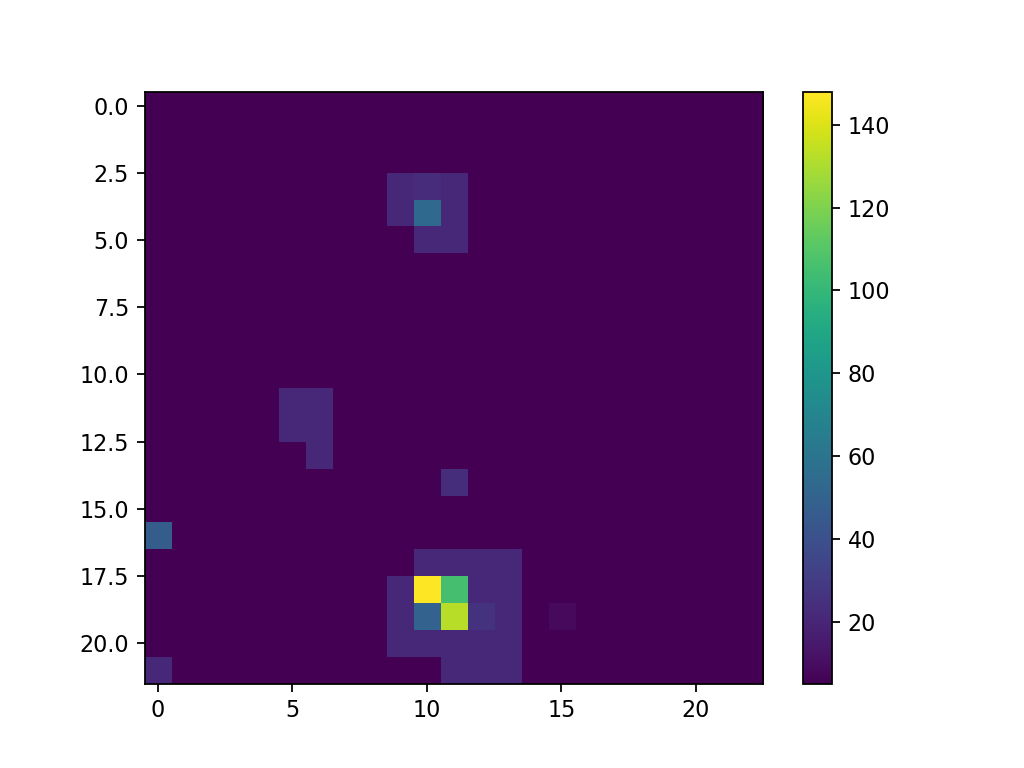

In [60]:
plt.figure()
plt.imshow(d[0]+d[1])
plt.colorbar()

In [98]:
data =d[0]+d[1] 

In [104]:
mag = M_0_lim(-2.5*np.log10(data) + 24.47,90)

In [150]:
GRB_rate(mag,80)

array([[1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10

In [107]:
from scipy.special import erf

In [110]:
1/2*(1-erf(x-mu/(sig*np.sqrt(2))))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1.,

In [127]:
def hack_prob(GRB_mag_lim):
    mu = 15.35
    sig = 1.59
    CDF = 1/2*(1+erf((GRB_mag_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [129]:
hack_prob(mag)

array([[0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.93272415, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.940

In [124]:
mu = 15.35
sig = 1.59
CDF = 1/2*(1+erf(mag-mu/(sig*np.sqrt(2))))

<IPython.core.display.Javascript object>


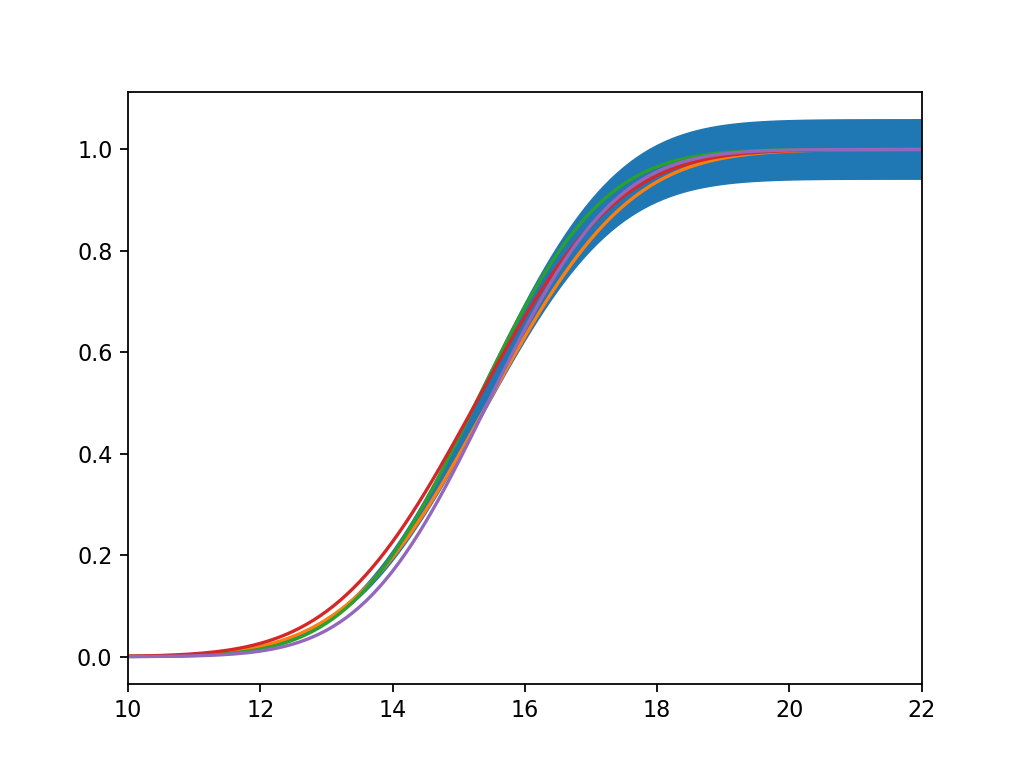

(10, 22)

In [198]:
x = np.arange(0,30,0.1)
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))
plt.fill_between(x,s-0.06*s,s+0.06*s)
plt.xlim(10,22)

<IPython.core.display.Javascript object>


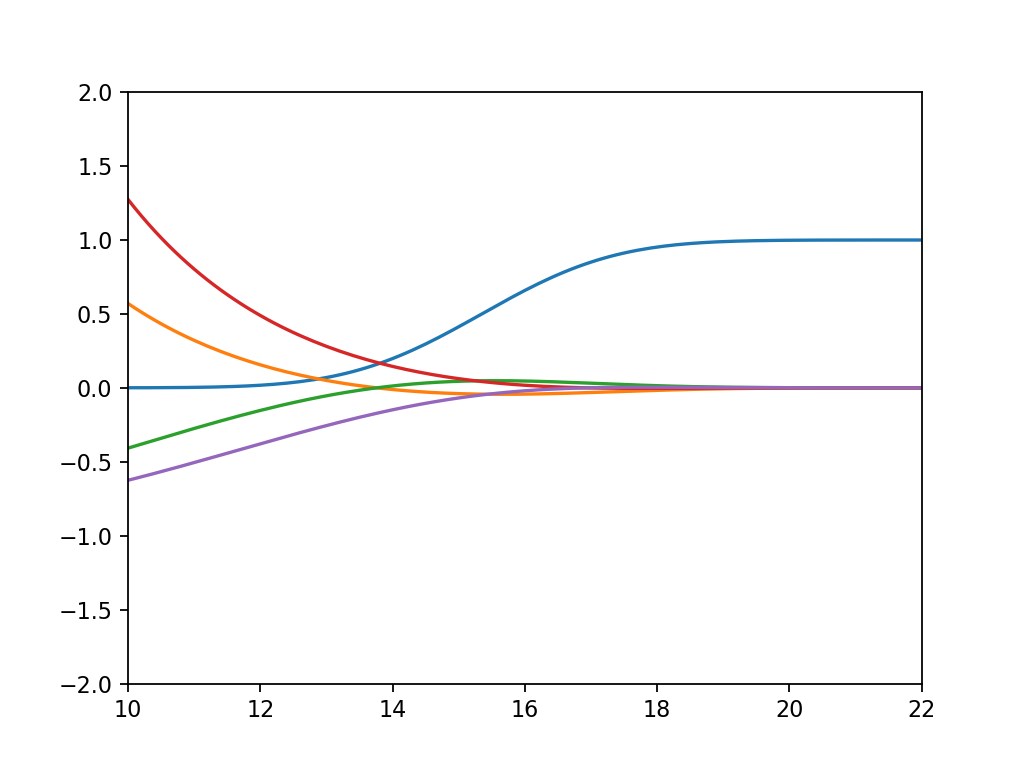

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(-2, 2)

In [182]:
x = np.arange(0,30,0.1)
s = 1/2*(1+erf((x-mu)/(sig*np.sqrt(2))))
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.xlim(10,22)
plt.ylim(-2,2)

In [199]:
300/41253

0.007272198385571959

# Off axis 

In [4]:
Flux_break(1)

3.3995657121375526e-27

In [7]:
test = 900e-6 *u.Jy
test.to(u.erg / u.s/ u.cm**2 / u.Hz)

<Quantity 9.e-27 erg / (cm2 Hz s)>

In [5]:
time_break(1)

1.64

In [54]:
def time_break(z):
    '''
    Calculate the power law break point time in days form explosion. 
    Eq. 2 from Zou 2007
    
    Input:
    ------
    z - float, redshift of GRB
    
    Output:
    -------
    t - float, time of the power law break
    '''
    t = 0.82*(1+z) * Ej**(1/3) * n0**(-1/3) * thetaj**2
    return t
from astropy.cosmology import FlatLambdaCDM

def Flux_break(Z):
    '''
    Calculate the flux value at the point where the powerlaw changes. 
    Eq. 3 from Zou 2007.
    
    Input:
    ------
    Z - float, redshift of GRB
    
    Output:
    -------
    flux.value - float, break point flux in erg/s/cm2/Hz
    '''
    # calculate the time of the power break
    t = time_break(Z)
    # calculate the luminosity distance from the redshift, in units of 
    # 10**28 cm
    D = cosmo.luminosity_distance(Z).to(u.cm).value / 1e28
    # calculate breakpoint flux
    flux = (515 * t**(-p) * 50.2**(2.2-p) * kf * km**((p-1)/2) * epsilon_e**(p-1) * 
            epsilon_b**((p+1)/4) * zeta**(p-1) * n0**((3-p)/12) * Ej**((p+3)/3) * D**(-2)
           * (1+Z)**((p+3)/2) * (nu/nur)**(-(p-1)/2)) #* 1e-6 *u.Jy  # Jy
    # convert the flux to cgs units
    #flux = flux.to(u.erg / u.s/ u.cm**2 / u.Hz)
    return flux#.value

def Time_evolution(Z,Theta):
    '''
    Calculate the light curve of a GRB afterglow. This is done by scaling the 
    flux at the break point of the lightcurve, by t**-alpha, where t is in days 
    and alpha is the power law. 
    
    I believe this is correct, however, it is never explicitely stated in the 
    Zou 2007 and Japelj 2011 papers. The closest those papers get are to state 
    F prop t**-alpha. 
    
    Inputs:
    -------
    Z - float, redshift of the GRB
    Theta - float, angle from on-axis, in degrees 
    
    Output:
    -------
    flux - 1D array, GRB lightcurve
    '''
    # calculate break time and flux
    t_b = time_break(Z)
    f_b = Flux_break(Z)
    print('break flux ', f_b)
    # establish the timescale, time in days from explosion
    t = np.geomspace(0.01,100,num=1000) # time in days 
    # define flux array
    flux = np.zeros_like(t)
    # identify all time points below the break time
    if Theta == 0: 
        ind = t < t_b
    else:
        a = a_factor(t, Z, Theta)
        ind = t < (t_b/a)
    
    # scale the break flux. Before the break alpha = 1,
    # see Japelj 2011.
    flux[ind] =  f_b * t[ind]**(-1)
    # After the break alpha = 7/4 (faster decline),
    # see Japelj 2011.
    flux[~ind] = f_b * t[~ind]**(-(1+3/4))
    # If it is an off-axis observation a scalling parameter applies.
    # From Zou2007: F(theta,t) = a**3 * F(0,a*t)
    # We take this to be F(theta,t) = a**4 * F(0,t), as F(t) = F_B * t**-alpha
    if Theta > 0:
        # calculate the off-axis factor
        
        # scale the flux
        flux = flux * a**4
        
    return flux

def gamma(t,z):
    '''
    Calculate the Lorentz factor of the GRB, using Eq 1 from Zou 2007.
    Inputs:
    -------
    t - 1D array, time in days since explosion
    z - float, redshift of the GRB
    
    Output:
    -------
    gam - float, Lorentz factor
    '''
    gam = 8.9 * (1 + z)**(3/8) * Ej**(1/8) * n0**(-1/8) * thetaj**(-1/4) * t**(-3/8)
    return gam

def a_factor(t,z,theta):
    '''
    Factor to relate on axis flux to off-axis flux.
    Inputs:
    -------
    t - 1D array, time since explosion in days
    z - float, redshift of event
    theta - float, viewing angle of the event, degrees
    
    Output:
    -------
    a - float, off-axis correction factor
    '''
    # convert theta to radians
    theta = theta * np.pi / 180 
    # calculate the Lorentz factor, Eq 1 from Zou 2007
    gam = gamma(t,z)
    # calculate beta factor, form Zou 2007 above Eq 5
    beta = np.sqrt(1 - (1/gam**2))
    # calculate correction factor, from Zou 2007 above Eq 5
    a = (1 - beta)/(1 - beta * np.cos(theta))
    return a

# power law index of shock-accelerated electrons 
p = 2.2 # value from Japelj 2011
# function defined in Zou 2007
zeta = 6*(p-2)/(p-1)
# function defined in Zou 2007
km = 0.73*(p-0.67)
# function defined in Zou 2007
kf = 0.09*(p+0.14)
# function defined in Zou 2007
kc = (p-0.46)*np.exp(3.16-1.16*p)
# explosion energy in units of 10**51 erg
Ej = 1 #10**51
# Density of the circumburst medium
n0 = 1 # not sure of the value
# Jet half open angle in radians 
# in units of 10**-1 from Zou 2011
thetaj = 1 # 10**-1
# energy equipartition factor of electron
# value from Japelj 2011
epsilon_e = 1 # 10**-1
# energy equipartition factor of magnetic field
# value from Japelj 2011
epsilon_b = 10 # 10**-3
# Frequency that the model is normalised to
# from Zou 2007
nur = 4.55e14 # Hz
# Frequency that the model is evaluated at
nu = 4.55e14#5.19e14 # Hz


<IPython.core.display.Javascript object>


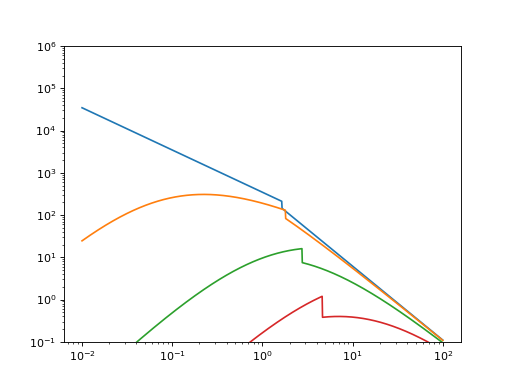

break flux  346.6271964445848
break flux  346.6271964445848
break flux  346.6271964445848
break flux  346.6271964445848


(0.1, 1000000.0)

In [56]:
tl = np.geomspace(0.01,100,num=1000) # time in days 
angles = np.array([0,2,6,12])
plt.figure()
for angle in angles:
    f = Time_evolution(1,angle)
    plt.loglog(tl,f,'-')
#plt.ylim(10**-30,10**-20)
plt.ylim(.1,1e6)

<IPython.core.display.Javascript object>


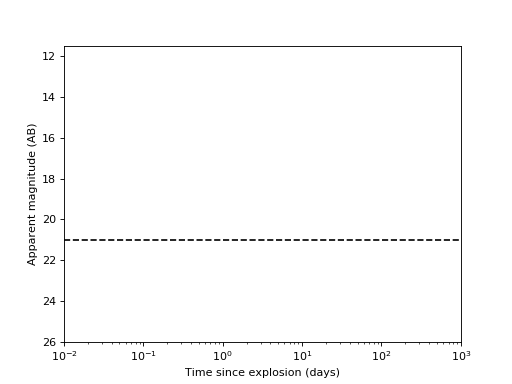

break time  1.64
ind break time  1.6376240745216872
break time  1.64
ind break time  1.6376240745216872
break time  1.64
ind break time  1.6376240745216872
break time  1.64
ind break time  1.6376240745216872


Text(0.5, 0, 'Time since explosion (days)')

In [23]:
angles = np.array([0,2,6,12])
plt.figure()
for angle in angles:
    f = Time_evolution(1,angle)
    mag = -2.5*np.log10(f) - 48.6
    plt.semilogx(tl,mag)
plt.ylim(26,11.5)
plt.xlim(0.01,1000)
plt.axhline(21,color='k',ls='--')
plt.ylabel('Apparent magnitude (AB)')
plt.xlabel('Time since explosion (days)')

<IPython.core.display.Javascript object>


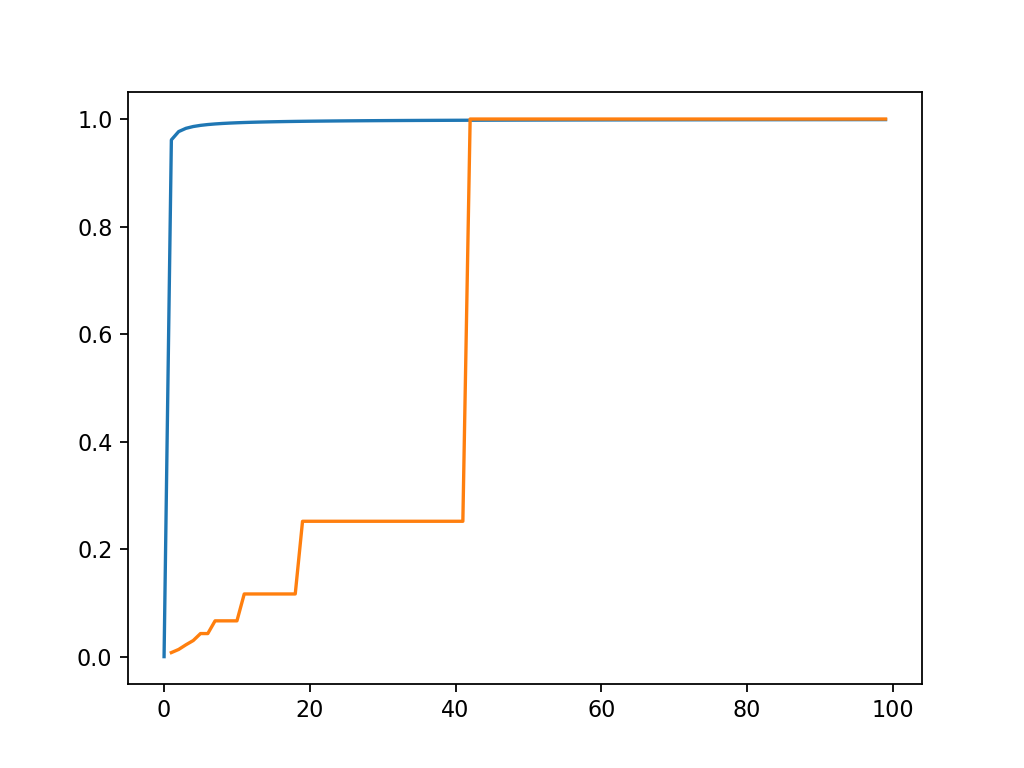

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in power
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [296]:
test = np.arange(0,100)
plt.figure()
plt.plot(test,a_factor(test,1,1))
plt.plot(test,A(test,1,.1,time_break(1)))

In [278]:
b=  1e-6 *u.Jy

In [279]:
b.to(u.erg / u.s/ u.cm**2 / u.Hz)

<Quantity 1.e-29 erg / (cm2 Hz s)>

In [18]:
Z = 1
t_b = time_break(Z)
print('break time ', t_b)
f_b = Flux_break(Z)
# establish the timescale, time in days from explosion
t = np.geomspace(0.01,100,num=1000) # time in days 
# define flux array
flux = np.zeros_like(t)
# identify all time points below the break time
ind = t < t_b
print('ind break time ', t[ind][-1])
# scale the break flux. Before the break alpha = 1,
# see Japelj 2011.
flux[ind] =  f_b * t[ind]**(-1)
# After the break alpha = 7/4 (faster decline),
# see Japelj 2011.
flux[~ind] = f_b * t[~ind]**(-(1+3/4))

break time  1.64
ind break time  1.6376240745216872


In [34]:
b = (515 * t_b**(-p) * 50.2**(2.2-p) * kf * km**((p-1)/2) * epsilon_e**(p-1) * 
            epsilon_b**((p+1)/4) * zeta**(p-1) * n0**((3-p)/12) * Ej**((p+3)/3)
           * (1+Z)**((p+3)/2) * (nu/nur)**(-(p-1)/2))

In [37]:
b / ((6701e6 * u.pc).to(u.cm).value/1e28)

722.1136098420245

In [25]:
D = Distance(z=Z)#.to(u.cm).value / 1e28

In [30]:
D#.to(u.pc).to(u.cm)

<Distance 6791.81083333 Mpc>

In [29]:
Distance(z=Z).to(u.cm)

<Distance 2.09573384e+28 cm>

In [ ]:
def Flux_break(Z):
    '''
    Calculate the flux value at the point where the powerlaw changes. 
    Eq. 3 from Zou 2007.
    
    Input:
    ------
    Z - float, redshift of GRB
    
    Output:
    -------
    flux.value - float, break point flux in erg/s/cm2/Hz
    '''
    # calculate the time of the power break
    tj = time_break(Z) # in days
    # calculate the luminosity distance from the redshift, in units of 
    # 10**28 cm
    D = Distance(z=Z).to(u.cm).value / 1e28
    # calculate breakpoint flux
    flux = (515 * tj**(-p) * 50.2**(2.2-p) * kf * km**((p-1)/2) * epsilon_e**(p-1) * 
            epsilon_b**((p+1)/4) * zeta**(p-1) * n0**((3-p)/12) * Ej**((p+3)/3) * D**(-2)
           * (1+Z)**((p+3)/2) * (nu/nur)**(-(p-1)/2)) #* 1e-6 *u.Jy  # Jy
    # convert the flux to cgs units
    #flux = flux.to(u.erg / u.s/ u.cm**2 / u.Hz)
    return flux#.value

In [38]:
from astropy.cosmology import WMAP9 as cosmo

In [39]:
cosmo.luminosity_distance(1)

<Quantity 6726.1412642 Mpc>

In [41]:
Distance(z=1)

<Distance 6791.81083333 Mpc>

In [90]:
cosmo.luminosity_distance(z).to(u.cm)

<Quantity 9.95050789e+27 cm>

In [103]:
import numpy as np
import afterglowpy as grb

jetType = -1     # top hat jet

thetaObs = 0.05  # Viewing angle in radians
E0 = 1.0e53      # Isotropic-equivalent energy in erg
thetaC = 0.1     # Half-opening angle in radians
thetaW = 0.1     # Truncation angle, unused for top-hat
b = 0            # power law index, unused for top-hat
n0 = 1.0         # circumburst density in cm^{-3}
p = 2.2          # electron energy distribution index
eps_e = 0.1      # epsilon_e
eps_B = 0.01     # epsilon_B
xi_N = 1.0       # Fraction of electrons accelerated
z = 0.1         # redshift
dL = cosmo.luminosity_distance(z).to(u.cm).value      # Luminosity distance in cm


# Space time points geometrically, from 10^3 s to 10^7 s
t = np.geomspace(1.0e2, 1.0e7, 3000)

# Calculate flux in a single X-ray band (all times have same frequency)
nu = np.empty(t.shape)
nu[:] = 5.19e14

# For convenience, place positional arguments in an array,
# and keywords into a dict

Y = np.array([thetaObs, E0, thetaC, thetaW, b, 0, 0, 0,
              n0, p, eps_e, eps_B, xi_N, dL])
Z = {'z': z}

# Calculate!

Fnu = grb.fluxDensity(t, nu, jetType, 0, *Y, **Z) * u.mJy # give it units
Fnu = Fnu.to(u.erg / u.s/ u.cm**2 / u.Hz).value # convert to cgs
mag = -2.5*np.log10(Fnu) -48.6 # calculate mag

RuntimeError: Could not read input arrays.

<IPython.core.display.Javascript object>


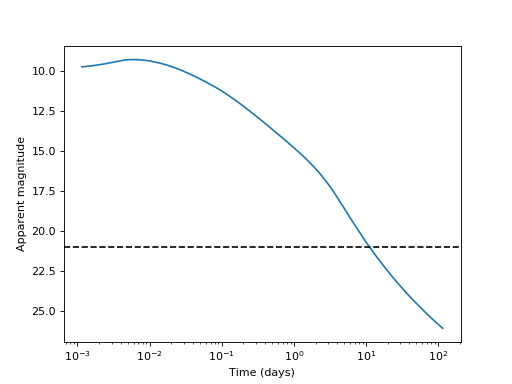

Text(0.5, 0, 'Time (days)')

In [109]:
#plt.figure()
#plt.loglog(t,Fnu)

plt.figure()
plt.semilogx(t/(60**2 * 24),mag)
plt.axhline(21,ls='--',color='k')
plt.gca().invert_yaxis()
plt.ylabel('Apparent magnitude')
plt.xlabel('Time (days)')

In [80]:
 a= 1 * u.mJy

In [87]:
a.to(u.erg / u.s/ u.cm**2 / u.Hz)

<Quantity 1.e-26 erg / (cm2 Hz s)>